# Faulty Steel Plates
## Author: Rodrigo de Lima Florindo (Matrícula: 101809)

O principal objetivo deste projeto é estimar a probabilidade de falhas de placas de aço através de uma rede neural do tipo _Multilayer Perceptron_ (MLP).

### 1 - Download do dataset
O download do dataset foi feito pelo site https://www.kaggle.com/datasets/uciml/faulty-steel-plates?resource=download, e então criamos as matrizes X e Y conforme explicado nas diretrizes do Projeto 3.

In [12]:
import pandas as pd

path = r"Dataset\faults.csv"

df = pd.read_csv(path)

num_df = df.select_dtypes(include=["number"])
full_matrix = num_df.to_numpy(dtype=float)

X = full_matrix[:,0:27]
Y = full_matrix[:, 27::]

print(X.shape)
print(X)
print(Y.shape)
print(Y)

(1941, 27)
[[ 4.200000e+01  5.000000e+01  2.709000e+05 ...  8.182000e-01
  -2.913000e-01  5.822000e-01]
 [ 6.450000e+02  6.510000e+02  2.538079e+06 ...  7.931000e-01
  -1.756000e-01  2.984000e-01]
 [ 8.290000e+02  8.350000e+02  1.553913e+06 ...  6.667000e-01
  -1.228000e-01  2.150000e-01]
 ...
 [ 1.450000e+02  1.740000e+02  3.867790e+05 ... -4.828000e-01
   5.200000e-03  7.079000e-01]
 [ 1.370000e+02  1.700000e+02  4.224970e+05 ... -6.060000e-02
  -1.710000e-02  9.919000e-01]
 [ 1.261000e+03  1.281000e+03  8.795100e+04 ... -2.000000e-01
  -1.139000e-01  5.296000e-01]]
(1941, 7)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


### 2 - Compreendendo o conjunto de dados (Análise exploratória)
1. i. A base de dados é consistente? **Sim, a base de dados é consistente, pois não há valores nulos, todas as linhas possuem o mesmo número de colunas e todos os dados fazem sentido (são int64 ou float64), como é possível observar abaixo.**

In [13]:
df = pd.read_csv(r"Dataset/faults.csv")

print(df.info())   # mostra tipos de dados e se há valores nulos
print(df.head())   # mostra as primeiras linhas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

2. Há elementos Faltantes? **Não há elementos faltantes, como pode ser observado a seguir.**

In [14]:
# Soma de nulos por coluna
print(df.isnull().sum())
# Soma de todos os nulos
print('Total number of nulls: ',df.isnull().sum().sum())

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64
Total number of nulls:  0


3. Há dados não numéricos? **Não, todos os dados são numéricos.**

In [15]:
print(df.dtypes)

X_Minimum                  int64
X_Maximum                  int64
Y_Minimum                  int64
Y_Maximum                  int64
Pixels_Areas               int64
X_Perimeter                int64
Y_Perimeter                int64
Sum_of_Luminosity          int64
Minimum_of_Luminosity      int64
Maximum_of_Luminosity      int64
Length_of_Conveyer         int64
TypeOfSteel_A300           int64
TypeOfSteel_A400           int64
Steel_Plate_Thickness      int64
Edges_Index              float64
Empty_Index              float64
Square_Index             float64
Outside_X_Index          float64
Edges_X_Index            float64
Edges_Y_Index            float64
Outside_Global_Index     float64
LogOfAreas               float64
Log_X_Index              float64
Log_Y_Index              float64
Orientation_Index        float64
Luminosity_Index         float64
SigmoidOfAreas           float64
Pastry                     int64
Z_Scratch                  int64
K_Scatch                   int64
Stains    

4. A base de dados é balanceada? **A base de dados não é balanceada, como é possível observar nos resultados abaixo. Por exemplo, é possível observar que menos que 3% da base de dados corresponde a placas com sujas, i.e., com valor 1 para `dirtiness`.**

In [16]:
# Nomes das classes (últimas 7 colunas)
class_names = df.columns[27:]

# Proporção de cada classe
for i, col in enumerate(class_names):
    counts = pd.Series(Y[:, i]).value_counts(normalize=True)
    print(f"{col}:")
    print(counts)
    print("-"*40)

Pastry:
0.0    0.918599
1.0    0.081401
Name: proportion, dtype: float64
----------------------------------------
Z_Scratch:
0.0    0.902112
1.0    0.097888
Name: proportion, dtype: float64
----------------------------------------
K_Scatch:
0.0    0.798557
1.0    0.201443
Name: proportion, dtype: float64
----------------------------------------
Stains:
0.0    0.962906
1.0    0.037094
Name: proportion, dtype: float64
----------------------------------------
Dirtiness:
0.0    0.971664
1.0    0.028336
Name: proportion, dtype: float64
----------------------------------------
Bumps:
0.0    0.79289
1.0    0.20711
Name: proportion, dtype: float64
----------------------------------------
Other_Faults:
0.0    0.653272
1.0    0.346728
Name: proportion, dtype: float64
----------------------------------------


5. Valores plausíveis, distribuição dos dados e outliers: **As variáveis apresentam distribuições bastante diferentes entre si: algumas são contínuas, outras binárias (ex., índices e tipos de aço), e várias possuem ordens de grandeza distintas, indo de valores entre 0 e 1 até milhões (como em `Pixels_Areas` e `Sum_of_Luminosity`). Observam-se ainda possíveis outliers, especialmente em variáveis de área e luminosidade. Esses fatores indicam que, embora os valores sejam plausíveis no contexto físico da aplicação, será necessário aplicar técnicas de normalização ou padronização para evitar que variáveis de maior escala dominem o treinamento do classificador.**

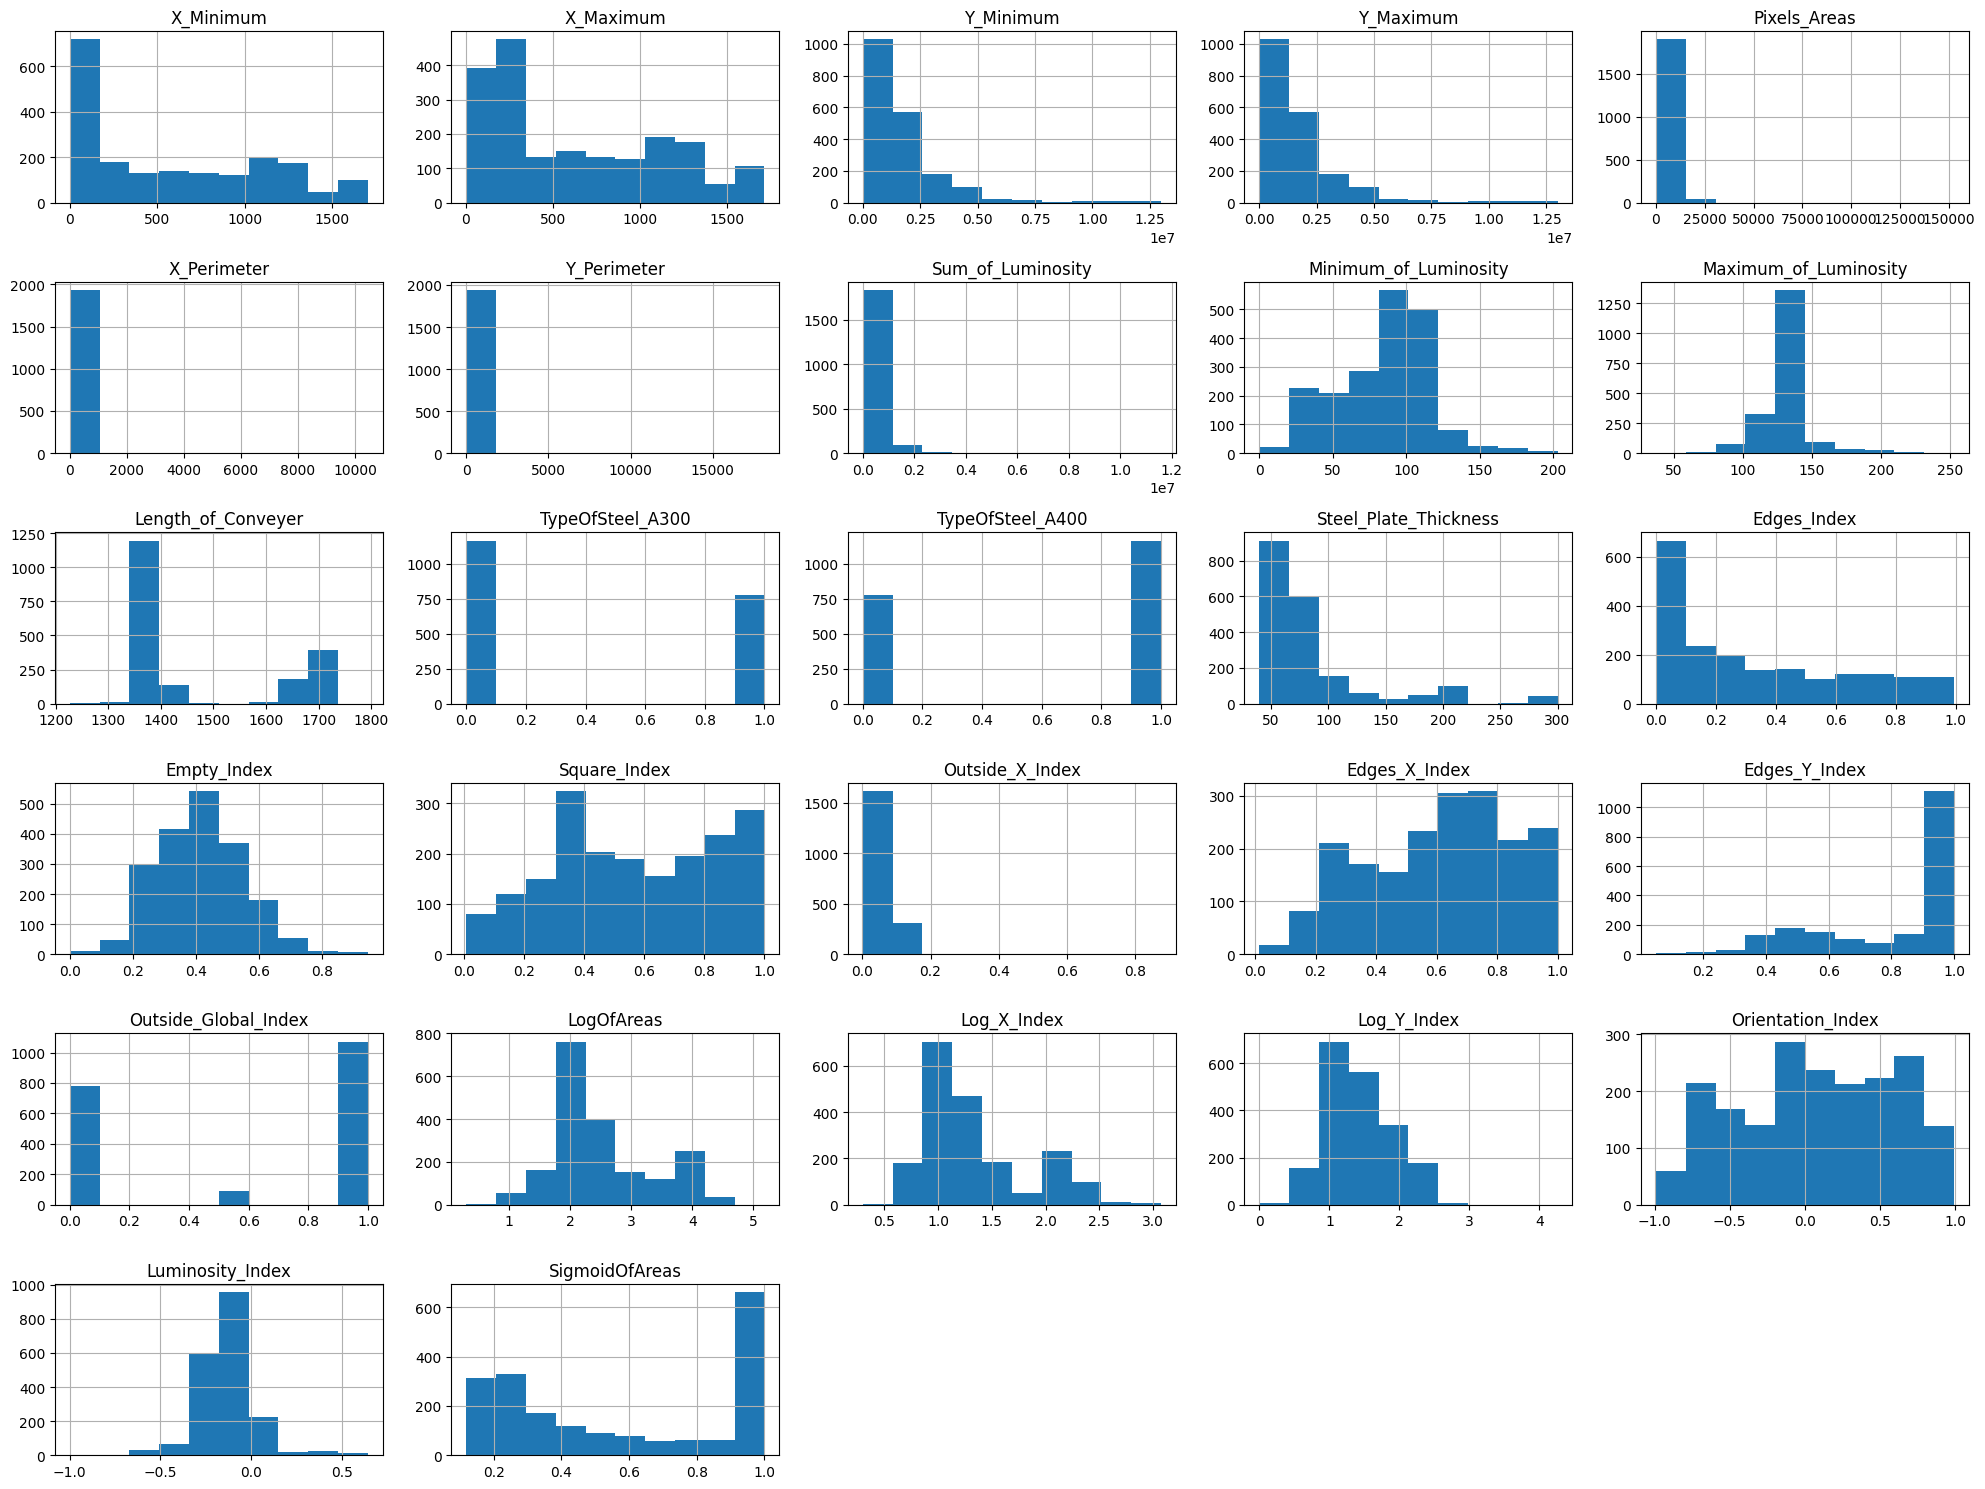

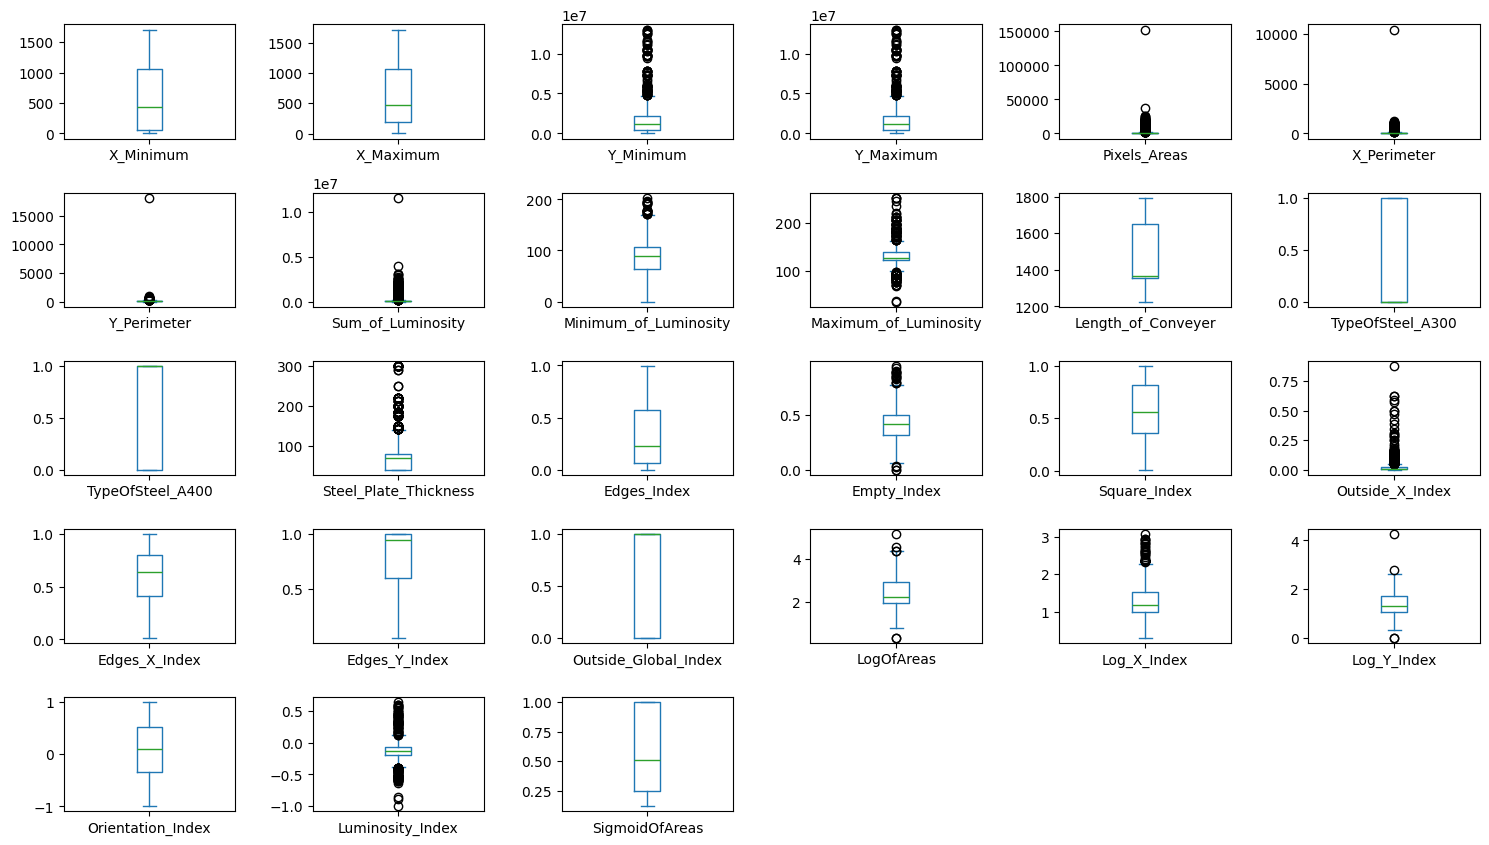

In [29]:
import matplotlib.pyplot as plt

# Seleciona apenas as 27 primeiras colunas (X)
X_df = df.iloc[:, :27]

# Histogramas
X_df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

# Boxplots
X_df.plot(kind="box", subplots=True, layout=(6, 6), figsize=(15, 10))
plt.tight_layout()
plt.show()


6. Há necessidade em normalizar ou padronizar as variáveis de entrada? Justifique. **Dada a grande diferença de escala entre as variáveis de entrada, algumas variando entre 0 e 1, enquanto outras atingem valores na casa de milhões, é necessário aplicar normalização ou padronização antes do treinamento da rede neural. Esse pré-processamento garante que todas as variáveis contribuam de forma equilibrada, evitando que atributos de maior magnitude influenciem desproporcionalmente o modelo.**

4. (Opcional): Balanceamento de dados: **Aplicamos a técnica SMOTE para balancear o dataset a seguir:**

In [ ]:
from imblearn.over_sampling import SMOTE

# Supondo que X e Y já estão definidos
# Como Y é multi-label (7 colunas), aplicamos o balanceamento para cada defeito
X_resampled_list, Y_resampled_list = [], []

for i in range(Y.shape[1]):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, Y[:, i])
    X_resampled_list.append(X_res)
    Y_resampled_list.append(y_res)

print("Original:", sum(Y[:,0]==1), "amostras positivas")
print("Balanceado:", sum(Y_resampled_list[0]==1), "amostras positivas")

Original: 158 amostras positivas
Balanceado: 1783 amostras positivas
